<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/MLP_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# MLP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap 

In [28]:
iris = load_iris()
x = iris.data
y = iris.target
print(iris.target_names)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,random_state=1,test_size=0.2)
np.bincount(y), np.bincount(y_train), np.bincount(y_test)

['setosa' 'versicolor' 'virginica']


(array([50, 50, 50]), array([40, 40, 40]), array([10, 10, 10]))

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

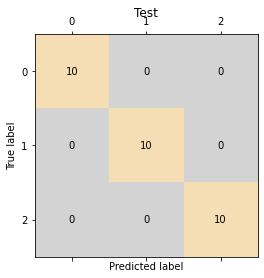

<Figure size 432x288 with 0 Axes>

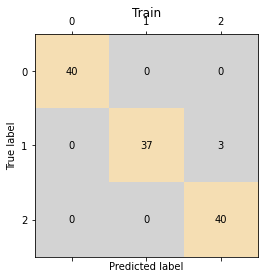

In [46]:
mlp =MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=[5], alpha = 0.5,max_iter=1000)  
# optimizer = 'lbfgs': quasi-Newton methods, 'sgd': stochastic gradient descent, and 'adam': stochastic gradient-based optimizer
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
print(np.sum(y_test!=y_pred)/len(y_test)*100)

#confusion matrix
def cm(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)
  cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])
  cm = confusion_matrix(y_test, y_pred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(y_test, mlp.predict(x_test), title='Test')
cm(y_train, mlp.predict(x_train), title='Train')
